## 1 Hypothesis Testing

Assume a friend of yours currently has a salary of $70k per year. She is considering a switch in her career, and has narrowed down her choices to three different options. She has been able to find the following data points for entry-level salaries (in thousands of dollars) for these three choices:

(1) 143 102 119 157 146 61 119 85  87 102

(2)  77 143 108  76  92 87 145 60  86  27

(3)  19  83  87  55 115 41  71 66 101  99

Assume that these data points are IID observations, and the difference between them can only be attributed to noise. Additionally, assume that after a career change your friend's salary will be a sample from the same distribution as the one behind your observed data points. 

(a) Can your friend expect an increase in her salary on average if she chooses #1?

(b) Is there any difference between the average salary of the three choices?

(c) Is there any difference between the average salary of #1 and #3?

For each of these parts, clearly define your hypothesis test, apply the relevant test in Python, and report your conclusion. Should you be worried about your multiple hypothesis tests?



In [4]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 44.8 MB/s eta 0:00:000:00:01m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
from scipy import stats

# Current salary
current_salary = 70

# Salaries for each option
option1 = [143, 102, 119, 157, 146, 61, 119, 85, 87, 102]
option2 = [77, 143, 108, 76, 92, 87, 145, 60, 86, 27]
option3 = [19, 83, 87, 55, 115, 41, 71, 66, 101, 99]

# PART A - Test the hypothesis for option1 > current_salary (one group)
t_stat, p_val = stats.ttest_1samp(option1, current_salary, alternative = 'greater')
print("The p-value for the option1 > current_salary test is", p_val)


# PART B - Test hypothesis for option1 = option2 = option3 (k groups)
f_stat, p_val = stats.f_oneway(option1, option2, option3)
print("The p-value for the option1 = option2 = option3 test is", p_val)


# PART C - Test hypothesis for option1 = option3 (two groups)
t_stat, p_val = stats.ttest_ind(option1, option3, equal_var = True)
print("The p-value for the option1 = option3 test is", p_val)
                                

The p-value for the option1 > current_salary test is 0.0009129462580935938
The p-value for the option1 = option2 = option3 test is 0.0403004821014734
The p-value for the option1 = option3 test is 0.010410173215386046


(a) We test the null hypothesis $H_0: p_1 < mu_0$ and alternative hypothesis $H_A: p_1 > mu_0$ where $p_1$ is the observed data in option1 and $mu_0$ is the current salary. We obtain a p-value of 0.0009, which is less than alpha = 0.05 significance level, meaning that the result is statistically significant and is strong enough evidence to reject the null hypothesis. Therefore, we can expect our friend to have an increase in her salary on average if she choosed option1. 

(b) We test the null hypothesis $H_0: p_1 = p_2 = p_3$ where $p_1$ is the observed data in option1, $p_2$ is the observed data in option2, and $p_3$ is the observed data in option3. We obtain a p-value of 0.04, which is less than alpha = 0.05 significance level, meaning that the result is statistically significant and is strong enough evidence to reject the null hypothesis. Therefore, we can conclude there is a difference between the average salary of the three options. 

(c) We test the null hypothesis $H_0: p_1 = p_3$ where $p_1$ is the observed data in option1 and $p_3$ is the observed data in option3. We obtain a p-value of 0.01, which is less than alpha = 0.05 significance level, meaning that the result is statistically significant and is strong enough evidence to reject the null hypothesis. Therefore, we can conclude there is a difference between the average salary of option1 and option3. 

Yes, we should be concerned about multiple hypothesis tests because it can lead to an increased risk of Type I errors, or false positives. To account for this we can use the Bonferroni Correction and calculate a corrected significance level as alpha divided by the number of tests. 

## 2 Regression to the Mean

In this problem we are going to work with a datset of heights for fathers and sons. Download the dataset.

(a) Assume x represents the height of the father and y represents the height of the son. Standardize the two covariates. You can use the following code:

    x = (x - np.mean(x)) / np.std(x)

    y = (y - np.mean(y)) / np.std(y)

Plot y vs. x in a scatter plot in Python

(b) Based on your intuition and without fitting a model, draw the line corresponding to the linear regression for this data. 

(c) Fit a linear regression in Python where the response variable is y. Draw the line corresponding to the fitted linear regression in the scatter plot. Does this line match your intuition from the previous part?

(d) Based on the fitted regression line, if a father is 10 inches taller than the average, how much greater is the expected height of the son compared to the average? And if a father is 10 inches shorter than the average, how much smaller is the expected height of the son compared to the average?

(e) Based on the answer to the previous part, do you think it is fair to say that heights become more and more "average" over time? Read about "regression to the mean" and revisit your answer.


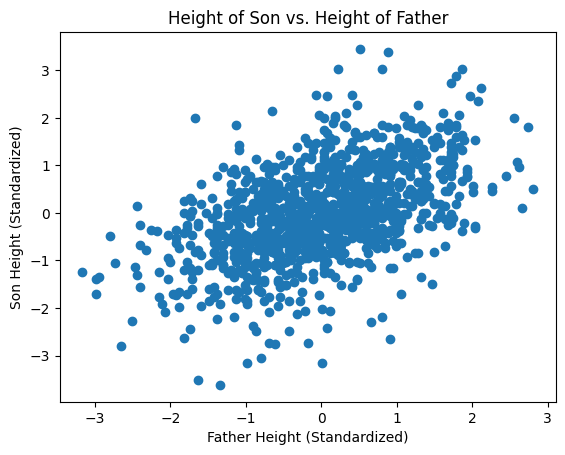

In [75]:
import os
import numpy as np
import pandas as pd

# PART A
# Read the Pearson.txt file and extract the data
with open('Pearson.txt', 'r') as file:
    x = []
    y = []

    # Skip the first line (header)
    next(file)
    
    # Read each line in the file, split the line into two values, and add to the appropriate lists
    for line in file:
        values = line.split()
        x.append(float(values[0]))
        y.append(float(values[1]))

# Standardize the covariates using the given code
x_standardized = (x - np.mean(x)) / np.std(x)
y_standardized = (y - np.mean(y)) / np.std(y)

# Plot y vs x in a scatter plot
plt.scatter(x_standardized, y_standardized)
plt.xlabel('Father Height (Standardized)')
plt.ylabel('Son Height (Standardized)')
plt.title('Height of Son vs. Height of Father')
plt.show()

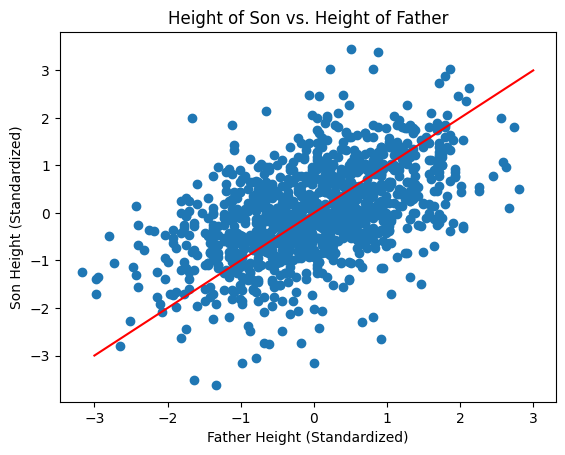

In [76]:
# PART B
# Draw linear regression line based on intuition
xpoints = np.array([-3, 3])
ypoints = np.array([-3, 3])

plt.scatter(x_standardized, y_standardized)
plt.xlabel('Father Height (Standardized)')
plt.ylabel('Son Height (Standardized)')
plt.title('Height of Son vs. Height of Father')
plt.plot(xpoints, ypoints, color='red')
plt.show()

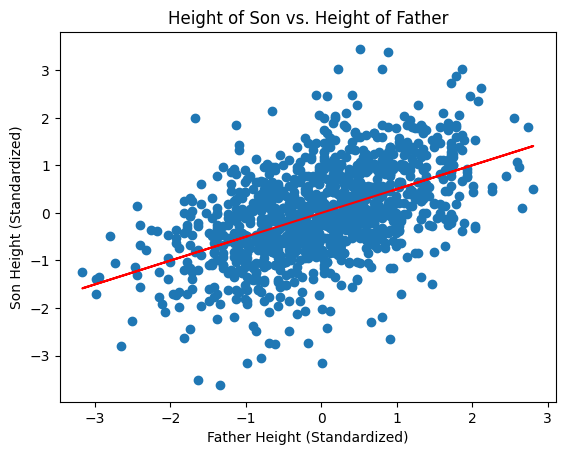

In [81]:
# PART C
# Fit linear regression model
model = LinearRegression()
model.fit(x_standardized.reshape(-1, 1), y_standardized)

# Calculate y_hat
y_hat = model.predict(x_standardized.reshape(-1, 1))

# Draw linear regression line
plt.scatter(x_standardized, y_standardized)
plt.xlabel('Father Height (Standardized)')
plt.ylabel('Son Height (Standardized)')
plt.title('Height of Son vs. Height of Father')
plt.plot(x_standardized, y_hat, color='red')
plt.show()

PART C

The line corresponding to the fitted linear regression is similar to my intuition shown in Part B, but the slope is much flatter at about 0.5 rather than a slope of 1 that I had used in Part B. 

In [90]:
# PART D
# Calculate slope - for every 1 unit of height for the father, there is slope units of height for the son
slope = model.coef_[0]

# Calculate the height difference
taller = 10 * slope
shorter = -10 * slope

print(f"If a father is 10 inches taller than average, we expect the son to be {taller: .2f} inches taller than average.")
print(f"If a father is 10 inches shorter than  average, we expect the son to be {shorter: .2f} inches shorter than average.")

If a father is 10 inches taller than average, we expect the son to be  5.01 inches taller than average.
If a father is 10 inches shorter than  average, we expect the son to be -5.01 inches shorter than average.


PART E

Based on the concept of "regression to the mean", the more extreme the value of the father's height, the closer the son's height should be to the mean population height, on average. So it should makes sense that over generations the difference in height between the father and son should converge toward the average height of the populaton.

## 3 Linear Regression

In this problem, we are going to see what happens if we use a linear regression to model the relationship between two independent random variables.

(a) Simulate 1000 data points from a normal distribution with mean 0 and standard deviation 1. Assign it to a variable named x. Simulate another 1000 data points from a similar normal distribution and assign them to variable y. Run a linear regression of y vs. x. Use statsmodels to view the statistical properties of the model. What is the slope of the model? Report your observations.

(b) Repeat the simulation in the previous part 100 times and gather the slopes in a list. Draw the distribution, and report your conclusions based on the result.


In [38]:
pip install statsmodels 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.3 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install scikit-learn

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 44.8 MB/s eta 0:00:0031m44.3 MB/s eta 0:00:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [91]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

# PART A
# Apply a random seed for reproducibility
np.random.seed(0)

# Simulate 1000 data points with normal distribution for x and y
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

# Run a linear regression
X_with_intercept = sm.add_constant(x)
model = sm.OLS(y, X_with_intercept).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9918
Date:                Mon, 05 Feb 2024   Prob (F-statistic):              0.320
Time:                        20:52:13   Log-Likelihood:                -1386.1
No. Observations:                1000   AIC:                             2776.
Df Residuals:                     998   BIC:                             2786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0122      0.031      0.398      0.6

PART A

The slope of the model is shown in the summary table above as -0.0309.

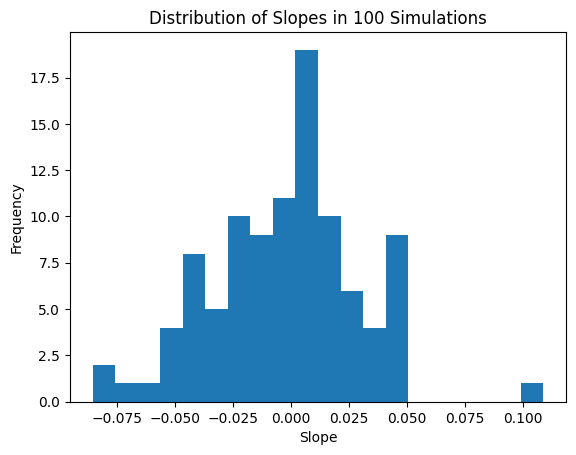

In [92]:
# PART B
import matplotlib.pyplot as plt

slopes = []

# Repeat simulation from Part A 100 times
for i in range (100):
    x = np.random.normal(0, 1, 1000)
    y = np.random.normal(0, 1, 1000)

    X_with_intercept = sm.add_constant(x)
    model = sm.OLS(y, X_with_intercept).fit()

    slopes.append(model.params[1])

# Draw the distribution of slopes
plt.hist(slopes, bins=20)
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Distribution of Slopes in 100 Simulations')
plt.show()

PART B

From the distribution of slopes over 100 simulations we can see that the distribution is skewed toward the left, so our slopes have a higher tendency to be negative. We also have an outlier on the right of a slope of 0.100 and the most common value of slope is about 0.010 over 100 simulations.